# MKTG 2120 Homework 1

## Question 1
This question uses the Hertz data, available from Wharton Customer Analytics (WCA). This is a unique and comprehensive data set from the Hertz Corporation, a world leader in retail rental cars and equipment. The secure data set is available on Canvas, under the Modules tab in the left menu bar. The “Hertz Student Data Key.docx” file describes the variables in the dataset. Please note that the data will only become visible to you after you sign the data user agreement, which is available on Canvas.

Hertz is interested in understanding customer satisfaction, and what variables are predictive of how much a customer will recommend Hertz. To that end, they implemented a survey, which was available to customers after they returned their rental cars. The results of the survey, together with the transaction data, are contained in the hertz.csv file. The variables that are derived from that survey are those that are highlighted in the data key. The data key also contains the original question wording.

Based on the Hertz data, please answer the following questions:

### 1a.

Make a plot describing the distribution of the Recommend_Hertz variable.

---


In [1]:
# Access ggplot to create graphics.
library(ggplot2)

# Read the data
hertz <- read.csv("/content/sample_data/hertz.csv")

# Generate frequency table using recommendation score data.
hertz_frequency <- table(hertz$Recommend_Hertz)

# Convert to data frame.
hertzdf <- as.data.frame(hertz_frequency)

# Rename the columns to match data set.
colnames(hertzdf) <- c("score", "frequency")

# Produce bar chart using geom_bar function, with count labels.
ggplot(hertzdf, aes(x = score, y = frequency)) +
  geom_bar(stat = "identity", fill = "red") +
  geom_text(aes(label = frequency), vjust = -0.5, color = "black", size = 3) +
  labs(title = "Distribution of Hertz Recommendation Scores",
       x = "Score",
       y = "Frequency") +
  scale_y_continuous(breaks = seq(0, max(hertzdf$frequency), by = 200))

Warning message in file(file, "rt"):
“cannot open file '/content/sample_data/hertz.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


### 1b.

Describe the shape of the distribution. Using terminology from class, describe why the distribution may look the way it does, and why it may not reflect the true likelihood of people to recommend Hertz.

---

The Distribution of Hertz Recommendation Scores is a left-skewed, unimodal bar graph. It is extremely left-skewed; the sample mean lies fairly high on the scale of satisfaction, and far to the right on the graph. On the surface, this might seem like a fantastic result, but the survey lends itself to multiple biases. For instance, the survey might suffer from non-response bias, meaning that satisfied customers are much more likely to respond to the survey than disappointed customers that might not want to waste their time on it. Additionally, psychological effects like leading questions or observer interference (users might be more inclined to give Hertz a higher score if they were being watched) might damage the survey's external validity. External validity might also be harmed if Hertz used data from only one location, as it might not be representative of the entire population.

### 1c

Compute the Net Promoter Score for Hertz.
(Important: in class, we saw NPS defined for a scale from 0-10. The scale in the Hertz data is only from 0-9. Hertz defines promoters as people who answered 8-9, neutrals as people who answered 6-7, and detractors as people who answered 0-5.)

----


*   NPS = % of promoters - % of detractors
*   Num. of 8-9 responses = 2,085. Num. of 0-5 responses = 378. Total responses = 3,000.
*    NPS = (2,085/3,000) - (378/3,000) = 69.5% - 12.6%. NPS = 56.9 (an excellent score)

### 1d.

Hertz suspects that whether someone is a promoter, neutral, or a detractor may depend on whether their purpose of travel was business or personal. Conduct a hypothesis test to test, at the 0.05 significance level, whether someone’s “NPS status” (i.e., promoter, neutral, or detractor) depends on their Purpose_of_Rental. For this question, you should ignore Purpose_of_Rental = Loaner. Provide the null and alternative hypotheses, relevant test statistic, p-value, and your conclusion. When stating your conclusion, make sure to explain the "so what?" of your result, in a way that a non-technical manager could understand.

---


In [ ]:
# Read the data
hertz <- read.csv("/content/sample_data/hertz.csv")

# Assuming your data frame is named 'data'
# Filter out Purpose_of_Rental = Loaner
Loaner <- subset(hertz, Purpose_of_Rental != "Loaner")

# Create a contingency table
contingency_table <- table(Loaner$Recommend_Hertz, Loaner$Purpose_of_Rental)

# Perform chi-squared test
chi_squared_result <- chisq.test(contingency_table)

# Print the results
print(chi_squared_result)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 25.906, df = 9, p-value = 0.002117



Null Hypothesis:
*   ​The distribution of NPS status (promoter, neutral, detractor) is independent of Purpose_of_Rental.

Alternate Hypothesis:
*   ​The distribution of NPS status depends on Purpose_of_Rental.

Pearson's Chi-squared test

data:  contingency_table
X-squared = 25.906, df = 9, p-value = 0.002117

The p-value of 0.002117 is less than the significance level of 0.05. Therefore We reject the null hypothesis. This means that there is a significance between the NPS Status and the Purpose of Rental. The purpose of rental, business or personal is linked to how customers are to the recommended Hertz.

For a non-technical manager: The manager can tailor the cusotmer service, marketing, or loyalty programs from the Puropose of Rental. Being either a business or personal customer can influence the different types of marketing strategies to use so that overall cusotmer satisfaction and the NPS score increases in the near future.




### 1e.

Building on the previous question, Hertz suspects that there is a lower fraction of promoters among business travelers, than among personal travelers. Conduct a hypothesis test to test this, at the 0.05 significance level. Provide the null and alternative hypotheses, relevant test statistic, p-value, and your conclusion. When stating your conclusion, make sure to explain the "so what?" of your result, in a way that a non-technical manager could understand.

---


In [ ]:
# Subset data for business and personal travelers
business_data <- subset(Loaner, Purpose_of_Rental == "Business")
personal_data <- subset(Loaner, Purpose_of_Rental == "Personal")

# Calculate proportions of promoters
prop_promoters_business <- sum(business_data$Recommend_Hertz %in% c(8, 9)) / nrow(business_data)
prop_promoters_personal <- sum(personal_data$Recommend_Hertz %in% c(8, 9)) / nrow(personal_data)

# Perform z-test for comparing proportions
prop_test_result <- prop.test(x = c(sum(business_data$Recommend_Hertz %in% c(8, 9)), sum(personal_data$Recommend_Hertz %in% c(8, 9))),
                              n = c(nrow(business_data), nrow(personal_data)),
                              alternative = "less", correct = FALSE)

# Print the results
print(prop_test_result)


	2-sample test for equality of proportions without continuity correction

data:  c(sum(business_data$Recommend_Hertz %in% c(8, 9)), sum(personal_data$Recommend_Hertz %in% c(8, 9))) out of c(nrow(business_data), nrow(personal_data))
X-squared = 11.716, df = 1, p-value = 0.0003099
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.03021472
sample estimates:
   prop 1    prop 2 
0.6679128 0.7257598 



Null Hypothesis:

The proportion of promoters among business travelers is equal to or higher than the proportion among personal travelers.

Alternate Hypotheiss:
The proportion of promoters among business travelers is lower than the proportion among personal travelers.



2-sample test for equality of proportions without continuity correction

X-squared = 11.716, df = 1, p-value = 0.0003099
less 95 percent confidence interval:
 -1.00000000 -0.03021472
sample estimates:
   prop 1    prop 2
0.6679128 0.7257598

The p-value is less than 0.05, so we reject the idea that the proportion of promoters among business travelers is equal to or higher than the proportion among personal travelers. There is evidence that the proportion of promoters among business travelers is less than the proportion among personal travelers.

For a non-technical Manager:
This hypothesis test shows a potential area for improvement in customer satisfaction among business travelers. This can be done through targeted marketing strategies to increase the recommended increase to others.

### 1f.

Hertz also believes that business travelers spend differently than another types of travelers. Conduct a hypothesis test at the 0.05 significance level to see if consumers who traveled for business spent significantly different amounts of money (on average, in USD) than consumers who traveled for personal reasons. Provide the null and alternative hypotheses, relevant test statistic, p-value, and your conclusion. When stating your conclusion, make sure to explain the "so what?" of your result, in a way that a non-technical manager could understand.

---


In [ ]:
# Perform t-test for comparing means
t_test_result <- t.test(business_data$Total_charges, personal_data$Total_charges)

# Print the results
print(t_test_result)


	Welch Two Sample t-test

data:  business_data$Total_charges and personal_data$Total_charges
t = -3.4917, df = 2401.4, p-value = 0.0004887
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57.43843 -16.12472
sample estimates:
mean of x mean of y 
 209.9765  246.7581 



Null Hypothesis:
The mean spending for business travelers is equal to the mean spending for personal travelers.

Alternate Hypothesis:
The mean spending for business travelers is significantly different from the mean spending for personal travelers

Conclusion: The p-value is less than 0.05, so we reject the idea that the mean spending for business travelers is equal to the mean spending for personal travelers. There is evidence that the mean spending for business travelers is significantly different from the mean spending for personal travelers.

For non-technical manager: Business travelers, on average, spend less than personal travelers. Hertz can use this information to tailor pricing strategies or promotions to better suit the spending behaviors of business and personal travelers.


### 1g.

Synthesize your results from the previous three questions to describe business travelers and their relationship with Hertz. As a manager or consultant to Hertz, what would you make of these findings?

---

Net Promoter Score (NPS) and Purpose of Travel:

There is a significant association between NPS status (promoter, neutral, detractor) and the purpose of travel (business or personal).
The purpose of travel seems to influence the likelihood of someone being a promoter, neutral, or detractor.

Net Promoter Score (NPS) and Business vs. Personal Travel:

Business travelers have a lower fraction of promoters compared to personal travelers. This implies that business travelers may be less likely to recommend Hertz compared to their personal travel counterparts.

Spending Patterns of Business and Personal Travelers:

There is a statistically significant difference in spending between business and personal travelers. On average, business travelers spend less than personal travelers.

Recommendations:
Focus on improving the customer experience for business travelers to enhance

1.   Focus on improving the customer experience for business travelers to enhance satisfaction and increase the likelihood of positive recommendations.
2.   Tailor services, promotions, and loyalty programs specifically for business travelers to address their unique needs and potentially increase their satisfaction.
3. Consider adjusting pricing strategies for business travelers, offering cost-effective options or targeted discounts to attract and retain their business.
4. Integrate marketing strategies that highlight the value proposition for both business and personal travelers, emphasizing tailored services and competitive pricing.

### Bonus

Bonus (2 points):  When visualizing the relationship between two numeric variables, we often use a scatterplot. However, when those numeric variables are ratings, which can only take on a few values, we often run into a problem.  
 
- Make a scatterplot of the variables Recommend_Hertz vs. Value_for_the_Money. You should notice that you can’t really see much. 
 
- Come up with a different visualization that reveals the relationship between these variables. This can be a modification of the scatterplot you just made, or a totally different form of visualization. However, it must show the relationship between value and recommendation, and it must use and display (in some form) the true data. 

---


Warning message:
“Removed 91 rows containing non-finite values (`stat_sum()`).”


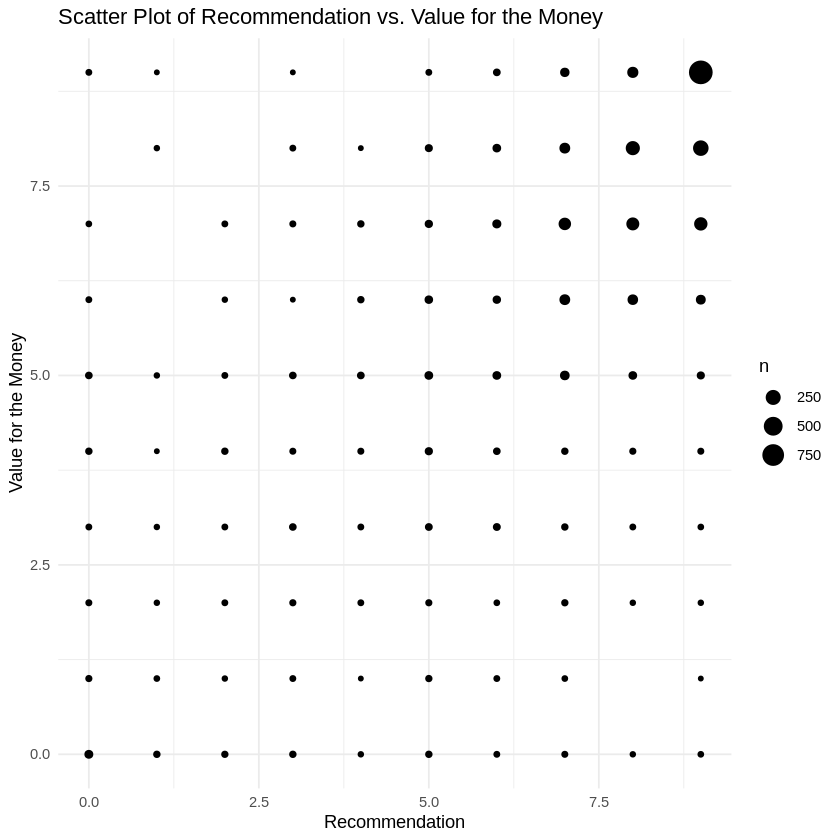

In [ ]:
# Create a scatter plot with counts
ggplot(hertz, aes(x = Recommend_Hertz, y = Value_for_the_Money)) +
  geom_count() +
  labs(title = "Scatter Plot of Recommendation vs. Value for the Money",
       x = "Recommendation",
       y = "Value for the Money") +
  theme_minimal()

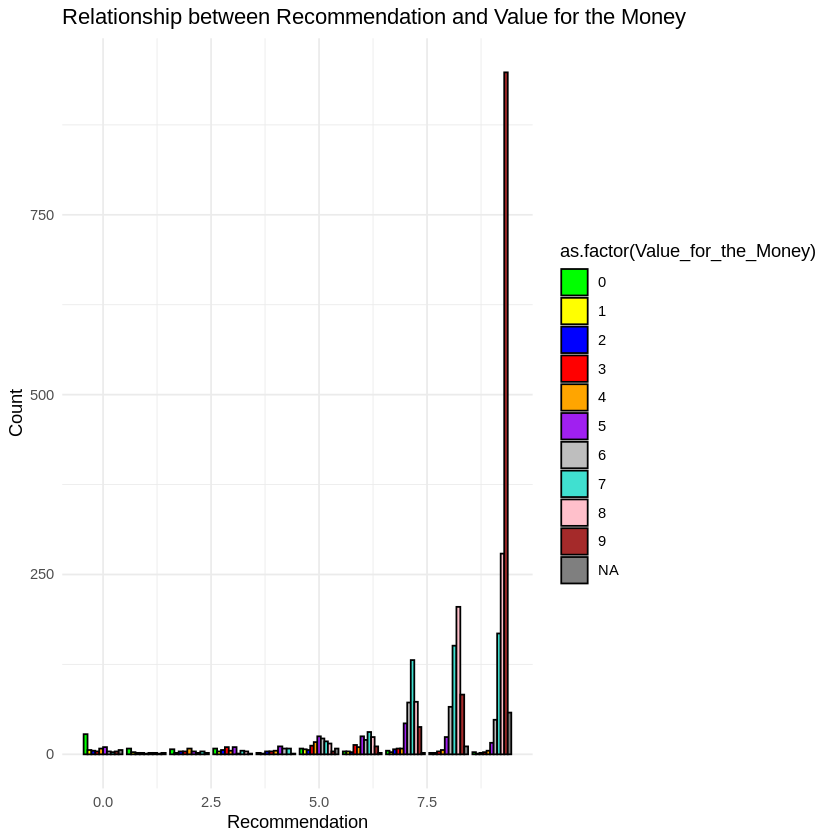

In [ ]:
# Create a grouped bar chart
ggplot(hertz, aes(x = Recommend_Hertz, fill = as.factor(Value_for_the_Money))) +
  geom_bar(position = "dodge", color = "black") +
  labs(title = "Relationship between Recommendation and Value for the Money",
       x = "Recommendation",
       y = "Count") +
  scale_fill_manual(values = c("green", "yellow", "blue", "red", "orange", "purple", "grey", "turquoise", "pink", "brown")) +
  theme_minimal()

## Question 2
This question uses data from a major international video game company, provided to us by WCA. This secure data set is available on Canvas under the Modules tab, and can be downloaded after you have signed the DUA. The sponsoring company has requested we mask its identity in public documents (such as this assignment description), but you will be able to see the company’s identity on Canvas.

The company is interested in understanding product usage for their football video game. In particular, they are interested in understanding how real-life football games affect engagement with their product. Data on the number of unique play sessions for their game (the variable numSessions) and the number of NFL football games on a given day (the variable numGames) are contained in the file: nfl_sessions.csv. For convenience, I have also created the variable DayNum, which is simply the number of days since the start of the data, and can be used in your analyses instead of the actual date.

Based on the NFL data, answer the following questions:


### 2a. 

Create a scatterplot showing the relationship between the number of NFL games (`numGames`) and the number of game sessions (`numSessions`). What patterns, if any, do you notice?

---

In [ ]:
# Access ggplot to create graphics.
library(ggplot2)

# Read the data.
nfl <- read.csv("/content/sample_data/nfl.csv")

# Generate scatterplot.
ggplot(nfl, aes(x = numGames, y = numSessions)) +
  geom_point() +
  labs(title = "Relationship between NFL Games and Game Sessions",
       x = "NFL Games",
       y = "Number of Game Sessions")

ERROR: Error in eval(expr, envir, enclos): object 'nfl' not found


It's difficult to tell, but it appears as if there is little correlation between the number of NFL games and game sessions. Days with a high amount of NFL games seem to have similar corresponding numbers of game sessions as days with little to no NFL games.

### **2.b**
Create a new variable in the data that equals 1 if there is at least one NFL game on a given day, and 0 otherwise. Then, create side-by-side plots to compare the distribution of the number of sessions for days where there was no NFL game, to days where there was at least one NFL game. Interpret the results.

### **2.c**
Use an appropriate hypothesis test to see if there are significantly more sessions on days with NFL games, versus days without NFL games. Provide the null and alternative hypotheses, relevant test statistic, p-value, and your conclusion.


### **2.d**
Presented with your results, your boss claims: “I don’t believe these results, because there is a confounding variable. Football games (almost) always happen on Sundays. Therefore, these results could simply be the effect of Sundays on the number of sessions, not the effect of NFL games. Maybe people just play games more on the weekends!” Is your boss correct? Explain why or why not.


### **2.e**
In class, we emphasized the importance of thinking “backwards” about marketing research: starting with a decision, then thinking what analyses should be done to support that decision. What decisions could the company be considering to justify the analysis done above?

## Question 3

A big fast-food brand has hired a marketing research firm to assess a potential change in the look of its stores. As part of their research, the firm plans to launch a large, representative survey of existing customers, to assess their reactions to the new concept. Since the associates of the marketing research firm took Data and Analysis for Marketing Decisions, they very sensibly chose to first launch a pre-test of their survey, to check for any possible issues.

Specifically, the firm asked each respondent the following questions in a random order, where a label for each is given in brackets:

- `Freq`: How often do you typically eat at our restaurants in a given month?
(1 time) (2-3 times) (4-6 times) (7-10 times) (More than 10 times)
- `DinExp`: How would you rate your most recent experience dining at our restaurants?
(Terrible) (Bad) (Satisfactory) (Good) (Excellent)
- `Store`: If both were equally convenient, would you prefer to dine at a restaurant with the new look, or with the existing look?
(New look) (Existing look)

The results of this pre-test survey, conducted with a random sample of 200 existing customers, are contained in the file look_survey.csv. The data key is in the file look_survey_key.pdf. Based on this data, please answer the following questions:


### 3a.

Construct three pivot tables (or in R, tables), that show the distributions of (i) `Freq` and `Store`, (ii) `DinExp` and `Store`, (iii) and `Freq` and `DinExp`. What do you notice about the relationships between these three questions? What does that imply about the company’s customers?

---

In [ ]:
# Read the data
survey <- read.csv("/content/look_survey.csv")

# Create three pivot tables
Freq_Store <- table(survey$Freq_Response, survey$Store_Response)
DinExp_Store <- table(survey$DinExp_Response, survey$Store_Response)
Freq_DinExp <- table(survey$Freq_Response, survey$DinExp_Response)

# Print the pivot tables
Freq_Store
DinExp_Store
Freq_DinExp

Warning message in file(file, "rt"):
“cannot open file '/content/look_survey.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


### 3b.

The researchers want to understand whether the order the questions were shown changed the answers given to the question “Store.” To answer their question, conduct an appropriate hypothesis test. Describe the null and alternative hypotheses, the relevant test statistic, the P-value, and your conclusions.

---

In [ ]:
# Create a contingency table of the question order and the store response
contingency_table <- table(survey$Order, survey$Store_Response)

# Conduct a chi-square test of independence
chisq_test <- chisq.test(contingency_table)

# Print the results of the test
print(chisq_test)

# Conclusion
if (chisq_test$p.value < 0.05) {
  c("We reject the null hypothesis and conclude that the order of the questions significantly affects the answers given to the question.")
} else {
  c("We fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the order of the questions significantly affects the answers given to the question.")
}



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 18.404, df = 5, p-value = 0.00248



[1] "We reject the null hypothesis and conclude that the order of the questions significantly affects the answers given to the question."

### 3c.

Intuitively (that is, not statistically), which of the other two questions do you think is driving the order effect? Said differently: if the researchers changed the placement of either the Freq or DinExp question, from coming before the Store question to coming after, which do you think would have a bigger effect? Explain (intuitively).

---

Intuitively, the frequency question is most likely to be driving the order effect. As seen in the first pivot table, customers who reported going to resturants more often were more likely to want to go to a resturant with an existing look whereas customers who reported going to resturants less often were more likely to want to go to a resturant with a new look. This could be driving the ordering bias because if I've already established that I don't go to man resturants, that could implicitly lead me to seek something new.

### 3d.

Implement a hypothesis test that tests this intuition. Describe the null and alternative hypotheses, the relevant test statistic, the P-value, and your conclusions.

---

In [ ]:
# Create a contingency table of the Freq question and the store response
contingency_table <- table(survey$Freq_Response, survey$Store_Response)

# Conduct a chi-square test of independence
chisq_test <- chisq.test(contingency_table)

# Print the results of the test
print(chisq_test)

# Conclusion
if (chisq_test$p.value < 0.05) {
  c("We reject the null hypothesis and conclude that the Freq question significantly affects the answers given to the question.")
} else {
  c("We fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the Freq question significantly affects the answers given to the question.")
}



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 13.274, df = 4, p-value = 0.01001



[1] "We reject the null hypothesis and conclude that the Freq question significantly affects the answers given to the question."